# Background

In this notebook, I derive the equations I used to run the inference of the invasion Ne trajectory that reaches a certain carrying capacity. Specifically, I derive the survival probability $S(u)$ of no change in ancestry between two loci that are $u$ Morgans apart. 

In [21]:
from sympy import *
from IPython.display import display, Math
init_printing()

First, we define the piecewise Ne trajectory of interest. 

In [28]:
t, Ne1, Ne2, t0, t1, u = symbols('t Ne_1 Ne_2 t_0 t_1, u', positive=True)
alpha = symbols('alpha')
x = symbols('x')
Ne = Piecewise((Ne1, t <= t0), (Ne1*exp(-alpha*(t-t0)), t<=t1), (Ne2, t>t0))
founders = Ne.subs({t: t0})
Ne
display(Math(r"N_e(t) = " + latex(Ne)))

<IPython.core.display.Math object>

First, we derive the TMRCA density for each piece:

In [31]:
gamma1 = 1 / (2*Ne1)
Gamma1 = integrate(1 / (2*Ne1), (x, 0, t))
tmrca1 = gamma1*exp(-Gamma1)
display(Math(r"f_1(t) = " + latex(tmrca1)))

<IPython.core.display.Math object>

In [40]:
gamma2 = exp(alpha*(t-t0)) / (2*Ne1)
Gamma2 = simplify(Gamma1.subs({t : t0}) + integrate(exp(alpha*(x-t0)) / (2*Ne1), (x, t0, t)))
tmrca2 = gamma2*exp(-Gamma2)
display(Math(r"f_2(t) = " + latex(tmrca2)))

<IPython.core.display.Math object>

In [43]:
gamma3 = 1 / (2*Ne2)
Gamma3 = simplify(Gamma2.subs({t : t1}) + integrate(1 / (2*Ne2), (x, t1, t)))
tmrca3 = gamma3*exp(-Gamma3)
display(Math(r"f_3(t) = " + latex(tmrca3)))

<IPython.core.display.Math object>

If we ignore healing events, then the probability of no change in ancestry given that they coalesce $t$ generations ago:

In [45]:
piece1 = exp(-2*t*u) * tmrca1
piece2 = exp(-2*t*u) * tmrca2
piece3 = exp(-2*t*u) * tmrca3

display(Math(r"S_1(u, t) = " + latex(piece1)))
display(Math(r"S_2(u, t) = " + latex(piece2)))
display(Math(r"S_3(u, t) = " + latex(piece3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The goal is to evaluate the function $S(u) = \int_{0}^{t_0} S_1(u, t)\, dt+ \int_{t_0}^{t_1} S_2(u, t)\, dt \int_{t_0}^\infty S_3(u, t)$. 

We can solve the first and second integrals analytically: 

In [49]:
integral1 = integrate(piece1, (t, 0, t0)).simplify()
display(Math(r"\int_{0}^{t_0} S_1(u, t)\, dt = " + latex(integral1)))

<IPython.core.display.Math object>

In [52]:
integral3 = integrate(piece3, (t, t1, oo)).simplify()
display(Math(r"\int_{t_0}^\infty S_3(u, t) = " + latex(integral3)))

<IPython.core.display.Math object>

To avoid overflow, we will also evaluate the third integral when alpha is very close to zero as:

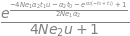

In [72]:
alpha2 = symbols('alpha2', nonzero=True)
integral3.subs({alpha: alpha2}).simplify()

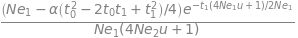

In [73]:
simplify(series(integral3, alpha, 0, 2).removeO())

In [ ]:
inner1 = alpha*(t0**2-2*t0*t1+t1**2) / 4
((Ne1 - inner1) * np.exp(-(t1*(4*Ne1*u+1)) / (2*Ne1))) / (Ne1*(4*Ne2*u+1))

We will use Gaussian quadrature rules to approximate the second integral: 

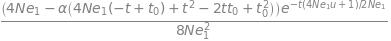

In [66]:
series(piece2, alpha, 0, 2).removeO().simplify()
((4*Ne1-alpha*(4*Ne1*(t0-t)+t**2-2*t*t0+t0**2))*np.exp((-t*(4*Ne1*u+1)) / (2*Ne1))) / (8*Ne1**2)

In [68]:
piece2.simplify()

⎧                                        α⋅(t - t₀)                   
⎪ 2⋅Ne₁⋅α⋅(α⋅(t - t₀) - 2⋅t⋅u) - α⋅t₀ - ℯ           + 1               
⎪ ─────────────────────────────────────────────────────               
⎪                        2⋅Ne₁⋅α                                      
⎪ℯ                                                                    
⎪──────────────────────────────────────────────────────  for Ne₁⋅α ≠ 0
⎪                        2⋅Ne₁                                        
⎨                                                                     
⎪            2⋅Ne₁⋅(α⋅(t - t₀) - 2⋅t⋅u) - t                           
⎪            ──────────────────────────────                           
⎪                        2⋅Ne₁                                        
⎪           ℯ                                                         
⎪           ───────────────────────────────                otherwise  
⎪                        2⋅Ne₁                                        
⎩     